# Hypothesis Testing with Insurance Data (Core)
- Brian Lafferty
- 8.4.22

### Libraries and Imports

In [287]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Loading Data

In [288]:
# Loading data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Question #1: Do smokers have higher insurance charges than non-smokers?

#### 1. State your Null Hypothesis and Alternate Hypothesis:

- Null Hypothesis: All people have the similar insurance changes regardless of smoking habits.
- Alternate Hypothesis: There is a difference in insurance changes depending on smoking habits.

#### 2. Select the correct test according to the data type and number of samples:

- The insurance charges are numeric and there are two groups (smokers, non-smokers).
- I will use a 2 sample T-Test

#### 3. Test the assumptions of your selected test:

- The assumptions are: No significant outliers, Normality, Equal Variance

#### 4. Execute the selected test, or the alternative test (if the assumptions are not met):

- removed outliers from non-smokers group
- neither group has a normal distribution, but they have enough samples
- they do not have equal variance

#### 5. Interpret your p-value and reject or fail to reject your null hypothesis:

- I reject my Null Hypothesis because the p-value was less than .05 and accept my Alternative Hypothesis that there is a difference in insurance charges between smokers and non-smokers.

#### 6. Show a supporting visualization that helps display the result:

- I adapted code from the learn platform to create the visualization below.

### Code to answer Question #1

In [289]:
# viewing how many smokers and non-smokers there are
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [290]:
# separtating into two groups based on smoking habit
smokers = df.loc[df['smoker'] == 'yes'].copy()
non_smokers = df.loc[df['smoker'] == 'no'].copy()

display(smokers.head())
non_smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [291]:
# selecting the charges feature from each group
smokers_charges = smokers['charges']
non_smokers_charges = non_smokers['charges']

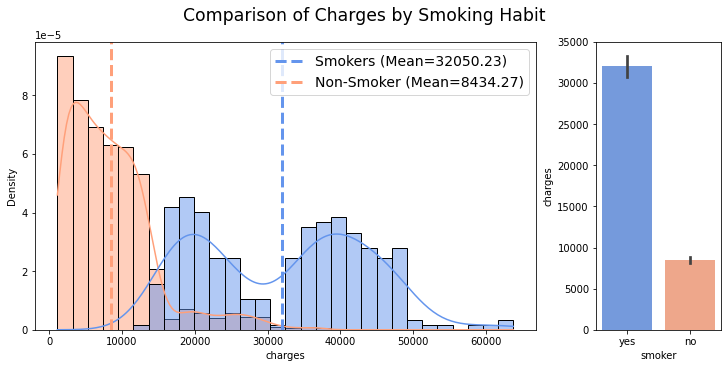

In [292]:
# Adapting the code from the lesson "Intro to T-Tests" to create a visualization

smoker_palette={'yes':'cornflowerblue', "no":'lightsalmon'}
# Creating base for plots to live
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smokers_charges), ls='--',lw=3, 
           label=f"Smokers (Mean={np.mean(smokers_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smokers_charges), ls='--', lw=3, 
           label=f"Non-Smoker (Mean={np.mean(non_smokers_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoking Habit',fontsize='xx-large');

#### Checking for and removing outliers

In [293]:
# check for outliers in smokers charges
zscores = stats.zscore(smokers_charges)
outliers = abs(zscores) > 3
np.sum(outliers)

0

In [294]:
# check for outliers in non-smokers charges
zscores = stats.zscore(non_smokers_charges)
outliers = abs(zscores) > 3
np.sum(outliers)

24

In [295]:
# removing the outliers in the non-smokers charges
non_smokers_charges = non_smokers_charges[(np.abs(stats.zscore(non_smokers_charges)) < 3)]

In [296]:
zscores = stats.zscore(non_smokers_charges)
outliers = abs(zscores) > 3
np.sum(outliers)

19

#### Normality tests

In [297]:
# checking smokers group for normality
result_smokers_charges = stats.normaltest(smokers_charges)
result_smokers_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

The result is less than .05. This means that we reject the hypothesis that the distribution is normal...or say it is not a normal distribution. But because of the number of samples is above 15, we can move on.

In [298]:
# checking non_smokers group for normality
result_non_smokers_charges = stats.normaltest(non_smokers_charges)
result_non_smokers_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

The distribution of non smokers charges is also not normal. But it has plenty of samples to move on with the next test.

#### Check for Equal Variance

In [299]:
# testing for equal variance
result = stats.levene(smokers_charges, non_smokers_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

This result is below .05 and means that we reject the hypothesis that the two groups have equal variance. meaning that the groups do not have equal variance. That is good to know, because I will make sure to use equal_var to False on the final test.

#### Preforming Independent T-Test

In [300]:
# using the independent t-test with the equal_var feature set to false
result = stats.ttest_ind(smokers_charges, non_smokers_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

This result is very much less than .05 mean that I can reject my Null Hypothesis and accept my Alternative Hypothesis. I will include this information above.

## Question #2: Are men more likely to smoke than women?

#### 1. State your Null Hypothesis and Alternate Hypothesis:

- Null Hypothesis: There is no difference between the smoking habits of men and women.
- Alternative Hypothesis: There is a difference between the smoking habits of men and women.

#### 2. Select the correct test according to the data type and number of samples:

- Categorical data, 2 groups
- I will use a Chi-squared test

#### 3. Test the assumptions of your selected test:

- There are two categorical variables
- The outcomes are independent

#### 4. Execute the selected test, or the alternative test (if the assumptions are not met):

- The two categorical variables are men and women, the outcome of them smoking or not is their choice and independent of others.

#### 5. Interpret your p-value and reject or fail to reject your null hypothesis:

- The p-value is less than .05 meaning that I reject my Null Hypothesis that men and women have similar smoking habits and accept the Alternative Hypothesis that there is a difference between the smoking habits of men and women.

#### 6. Show a supporting visualization that helps display the result:

- chart included below

In [301]:
# display the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


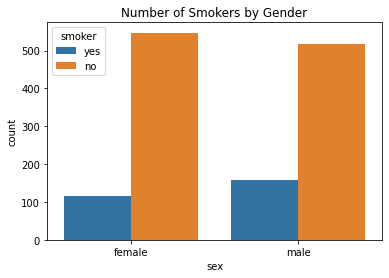

In [302]:
# creating a visualization for the test
ax = sns.countplot(data = df, x = 'sex', hue = 'smoker')
ax.set_title('Number of Smokers by Gender');

In [303]:
# creating the contingency table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [304]:
# running the chi squared test
result = stats.chi2_contingency(table)
# making sure that the output is in the correct form
chi2, p, deg_free, expected_vals = result
# the p_value
print(f'The p_value is {p}')
# is p less than .05
p < .05

The p_value is 0.006548143503580696


True

summary of results above

## Question #3: Do different regions have different charges, on average?

#### 1. State your Null Hypothesis and Alternate Hypothesis:

- Null Hypothesis: All regions have similar average charges.
- Alternative Hypothesis: There is a difference between the average charges of regions.

#### 2. Select the correct test according to the data type and number of samples:

- More than 2 samples (4 regions), numeric - because I am reviewing the difference between charges
- I will use an ANOVA test

#### 3. Test the assumptions of your selected test:

- No significant outliers, equal variance, normality

#### 4. Execute the selected test, or the alternative test (if the assumptions are not met):

- removed the outliers
- not normal distribution, but large enough to proceed
- does not have equal variance - used the Kruskal-Wallis test

#### 5. Interpret your p-value and reject or fail to reject your null hypothesis:

- The p-value was greater than 0.05 which means that I fail to reject the Null Hypothesis. All regions have similar insurance charges.

#### 6. Show a supporting visualization that helps display the result:

- chart included below

In [305]:
# checking how many regions there are.... is there more than 2?
len(df['region'].unique())

4

In [306]:
# viewing the number of samples in each region
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [307]:
# groupby to get the numbers I am looking for
region_charges_avg = df.groupby('region')['charges'].mean()
region_charges_avg

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [308]:
# coverting the pandas series into a dictionary
region_charges = region_charges_avg.to_dict()
region_charges

{'northeast': 13406.384516385804,
 'northwest': 12417.575373969232,
 'southeast': 14735.41143760989,
 'southwest': 12346.937377292308}

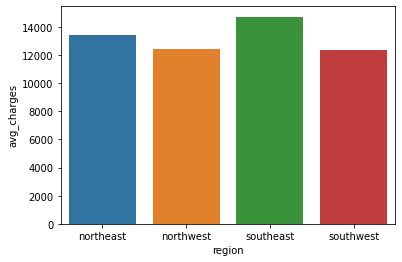

In [309]:
# converting the pandas series created in the groupby into an object I could graph
# refereneced this post and adapted code: https://stackoverflow.com/questions/46793448/plotting-series-using-seaborn
avg_region_charges = region_charges_avg.reset_index()
avg_region_charges.columns = ['region', 'avg_charges']

# visualizing the data
sns.barplot(data = avg_region_charges, x = 'region', y = 'avg_charges');

In [310]:
# following what the learn platform does
groups = {}
# loop through all unique categories
for i in df['region'].unique():
    # getting the series for the group
    data = df.loc[df['region'] == i, 'charges'].copy()
    
    # saving info into dictionary
    groups[i] = data
    
# checking if all regions were captured
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Testing Assuptions

#### Checking for and Removing Outliers

In [311]:
# checking z scores for outliers
zscore_results = {}

for i, data in groups.items():
    zscores = stats.zscore(data)
    outliers = abs(zscores) > 3
    
    # outliers to a dictionary
    zscore_results[i] = {'outliers': np.sum(outliers)}
    
# creating a dataframe from the dictionary
zscore_results_df = pd.DataFrame(zscore_results).T
zscore_results_df

,outliers
southwest,8
southeast,2
northwest,7
northeast,4


In [312]:
# removing outlier from the groups
# loop through all groups and drop outliers
for i, data in groups.items():

    # taking out the outliers
    data = data[(np.abs(stats.zscore(data)) < 3)] 
    
    # saving updated data
    groups[i] = data

#### Assumption of Normality

In [313]:
# completing a normal test on each group
normality_results = {}

for i, data in groups.items():
    stat, p = stats.normaltest(data)
    
    # saving p-value, test statistic and the group size
    normality_results[i] = {'n': len(data), 'p': p, 'test stat': stat}
    
# creating a dataframe from the dictionary
normal_results_df = pd.DataFrame(normality_results).T
normal_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [314]:
# using a pandas dataframe to track if there is a significant result
normal_results_df['sig_result'] = normal_results_df['p'] < .05
normal_results_df

,n,p,test stat,sig_result
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


Each group does not have a normal distribution! Because each group is large enough we can proceed.

#### Testing Equal Variance

In [315]:
# using the Levene test to check equal variance
# also using * operator to unpack the dictionary
stats.levene(*groups.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

The p value is less than .05 so I will reject the Hypothesis that they have equal variance. Because this was an ANOVA test but does not have equal variance, I can use Kruskal-Wallis test according to the Hypothesis testing guide.

#### Completing the Kruskal-Wallis test

In [316]:
# using stats.kruskal
result = stats.kruskal(*groups.values())
result

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

The p-value is greater than .05 which means that I fail to reject the null Hypothesis that there is a difference in regions.